In [3]:
from magicbox.io.io import CiftiReader
import numpy as np
import pandas as pd
import nibabel as nib
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import os
from os.path import join as pjoin
from raven_module import get_raven_sub_flag
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
template_brain = '/nfs/t2/raven/data/bold/derivatives/ciftify/sub-01/MNINonLinear/Results/ses-raven_task-action/ses-raven_task-action_hp200_s4_level2.feat/sub-01_ses-raven_task-action_level2_cope_const_obj_number_hp200_s4.dscalar.nii'
roi_dir = '/nfs/h1/userhome/liyifan/workingdir/Raven-fmri/result/roi'
roi_save_path = '/nfs/h1/userhome/liyifan/workingdir/Raven-fmri/result/roi_transform/'
scalar_lh = CiftiReader(template_brain).get_stru_pos('CIFTI_STRUCTURE_CORTEX_LEFT')
scalar_rh = CiftiReader(template_brain).get_stru_pos('CIFTI_STRUCTURE_CORTEX_RIGHT')
save_header = nib.load(template_brain).header
sub_flag = get_raven_sub_flag()

In [ ]:
CiftiReader(template_brain).get_stru_pos

In [ ]:
CiftiReader(template_brain).get_stru_pos

In [3]:
def stat(mask_path,data1,data2,data3,data1_name,data2_name,data3_name):
    #path = '/nfs/h1/userhome/liyifan/workingdir/Raven-fmri/result/roi_transform/attribute_left_angular_gyrus.dscalar.nii'
    mask = nib.load(mask_path).get_fdata().astype(bool).reshape(-1)
    masked_data1 = data1[mask]
    masked_data2 = data2[mask]
    masked_data3 = data3[mask]

    f_statistic, p_value = f_oneway(masked_data1, masked_data2, masked_data3)
    # 显示方差分析结果
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    # 判断是否显著差异
    if p_value < 0.05:
        print("ANOVA结果：有显著差异")
    else:
        print("ANOVA结果：无显著差异")
        
    data = np.concatenate([masked_data1, masked_data2, masked_data3])
    labels = np.array([data1_name] * len(masked_data1) + [data2_name] * len(masked_data2) + [data3_name] * len(masked_data3))
    df = pd.DataFrame({'Value': data, 'Group': labels})

    # 使用pairwise_tukeyhsd进行多重比较
    tukey_results = pairwise_tukeyhsd(df['Value'], df['Group'])

    print(tukey_results)

    # 绘制两个数据集的箱线图
    my_plot = sns.boxplot(data=[masked_data1, masked_data2, masked_data3])

    labels = [data1_name,data2_name,data3_name]
    my_plot.set_xticklabels(labels)
    # 可选：添加标题和标签
    #y_max = 1
    #y_min = 1
    #plt.plot([1,2], [y_max,y_max], linewidth=1, color='k') 
    #plt.plot([1,1], [y_max,0], linewidth=1, color='k') 
    #plt.plot([2,2], [y_max,0], linewidth=1, color='k') 
    #plt.text(1.45,0.9,'**',fontsize=15,color='black')
    #plt.title("Box Plot Example")
    #plt.xlabel("X-axis Label")
    plt.ylabel("vertex activation")
    # 显示图形
    plt.show()

In [4]:
def stat2(mask_path,data1,data2,data3,data1_name,data2_name,data3_name):
    #path = '/nfs/h1/userhome/liyifan/workingdir/Raven-fmri/result/roi_transform/attribute_left_angular_gyrus.dscalar.nii'
    mask = nib.load(mask_path).get_fdata().astype(int).reshape(-1)
    #roi_vertex = np.sum(mask)
    copies = np.tile(mask, (90, 1))
    # 将副本数组拼接成一个大的 (1, 91282*90) 的数组
    mask = np.concatenate(copies, axis=0)

    masked_data1 = data1[mask]
    masked_data2 = data2[mask]
    masked_data3 = data3[mask]

    f_statistic, p_value = f_oneway(masked_data1, masked_data2, masked_data3)
    # 显示方差分析结果
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    # 判断是否显著差异
    if p_value < 0.05:
        print("ANOVA结果：有显著差异")
    else:
        print("ANOVA结果：无显著差异")
        
    data = np.concatenate([masked_data1, masked_data2, masked_data3])
    labels = np.array([data1_name] * len(masked_data1) + [data2_name] * len(masked_data2) + [data3_name] * len(masked_data3))
    df = pd.DataFrame({'Value': data, 'Group': labels})

    # 使用pairwise_tukeyhsd进行多重比较
    tukey_results = pairwise_tukeyhsd(df['Value'], df['Group'])

    print(tukey_results)

    # 绘制两个数据集的箱线图
    my_plot = sns.boxplot(data=[masked_data1, masked_data2, masked_data3])

    labels = [data1_name,data2_name,data3_name]
    my_plot.set_xticklabels(labels)
    # 可选：添加标题和标签
    #y_max = 1
    #y_min = 1
    #plt.plot([1,2], [y_max,y_max], linewidth=1, color='k') 
    #plt.plot([1,1], [y_max,0], linewidth=1, color='k') 
    #plt.plot([2,2], [y_max,0], linewidth=1, color='k') 
    #plt.text(1.45,0.9,'**',fontsize=15,color='black')
    #plt.title("Box Plot Example")
    #plt.xlabel("X-axis Label")
    plt.ylabel("vertex activation")
    # 显示图形
    plt.show()

In [5]:
def stat3(mask_path,data1,data2,data3,data1_name,data2_name,data3_name):
    #path = '/nfs/h1/userhome/liyifan/workingdir/Raven-fmri/result/roi_transform/attribute_left_angular_gyrus.dscalar.nii'
    mask = nib.load(mask_path).get_fdata().astype(bool).reshape(-1)
    masked_data1 = data1[mask]
    masked_data2 = data2[mask]
    masked_data3 = data3[mask]

    f_statistic, p_value = f_oneway(masked_data1, masked_data2, masked_data3)
    # 显示方差分析结果
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    # 判断是否显著差异
    if p_value < 0.05:
        print("ANOVA结果：有显著差异")
    else:
        print("ANOVA结果：无显著差异")
        
    data = np.concatenate([masked_data1, masked_data2, masked_data3])
    labels = np.array([data1_name] * len(masked_data1) + [data2_name] * len(masked_data2) + [data3_name] * len(masked_data3))
    df = pd.DataFrame({'Value': data, 'Group': labels})

    # 使用pairwise_tukeyhsd进行多重比较
    tukey_results = pairwise_tukeyhsd(df['Value'], df['Group'])

    print(tukey_results)

    # 绘制两个数据集的箱线图
    my_plot = sns.boxplot(data=[masked_data1, masked_data2, masked_data3])

    labels = [data1_name,data2_name,data3_name]
    my_plot.set_xticklabels(labels)
    # 可选：添加标题和标签
    #y_max = 1
    #y_min = 1
    #plt.plot([1,2], [y_max,y_max], linewidth=1, color='k') 
    #plt.plot([1,1], [y_max,0], linewidth=1, color='k') 
    #plt.plot([2,2], [y_max,0], linewidth=1, color='k') 
    #plt.text(1.45,0.9,'**',fontsize=15,color='black')
    #plt.title("Box Plot Example")
    #plt.xlabel("X-axis Label")
    plt.ylabel("vertex activation")
    # 显示图形
    plt.show()

In [6]:
for file in os.listdir(roi_dir):
    if file.startswith('rules_left') | file.startswith('attribute_left'):
        lh = nib.load(pjoin(roi_dir,file)).get_fdata()
        save = np.zeros((1,91282))
        save[0, 0:29696] = lh[:, 0, 0][scalar_lh[3]]
        save = np.where(save != 0,1,0)
        nib.save(nib.Cifti2Image(save, save_header), pjoin(roi_save_path, file.replace('nii','dscalar.nii')))
    elif file.startswith('rules_right') | file.startswith('attribute_right'):
        rh = nib.load(pjoin(roi_dir,file)).get_fdata()
        save = np.zeros((1,91282))
        save[0, 29696:59412] = rh[:, 0, 0][scalar_rh[3]]
        save = np.where(save != 0,1,0)
        nib.save(nib.Cifti2Image(save, save_header), pjoin(roi_save_path, file.replace('nii','dscalar.nii'))) 

29716

done with ROI spacial registration

In [7]:
cifti_path = '/nfs/t2/raven/data/bold/derivatives/ciftify'
sub_path = 'MNINonLinear/Results/ses-raven_task-action/ses-raven_task-action_hp200_s6_level2.feat'

In [8]:
dist3 = []
const = []
prog = []
symbolic = []
obj = []
edge = [] 

In [9]:
for sub in sub_flag:
    path1 = pjoin(cifti_path,sub)
    path2 = pjoin(path1,sub_path)
    for file in os.listdir(path2):
        if file.startswith(sub) and '_cope_dist3' in file:     
            dist3.append(pjoin(path2,file))
        if file.startswith(sub) and '_cope_const' in file:     
            const.append(pjoin(path2,file))
        if file.startswith(sub) and '_cope_prog' in file:     
            prog.append(pjoin(path2,file))
        if file.startswith(sub) and '_cope' in file and '_edge' in file:     
            edge.append(pjoin(path2,file))
        if file.startswith(sub) and '_cope' in file and '_obj' in file:     
            obj.append(pjoin(path2,file))
        if file.startswith(sub) and '_cope' in file and '_symbolic' in file:     
            symbolic.append(pjoin(path2,file))                               

In [10]:
info_tuple_list = []

In [11]:
for sub in sub_flag:
    path1 = pjoin(cifti_path,sub)
    path2 = pjoin(path1,sub_path)
    for file in os.listdir(path2):
        if file.startswith(sub) and '_cope' in file:     
            info = (file[0:file.find('_')],file[file.find('_cope')+len('_cope')+1:file.find('_number')],pjoin(path2,file))
            info_tuple_list.append(info)

In [12]:
template = np.zeros((1,91282))
for info in info_tuple_list:
    if info[0] == 'sub-01' and 'edge' in info[1]:
        template = template + nib.load(info[2]).get_fdata()
template = template / 3

In [99]:
for roi_file in os.listdir(roi_save_path):
    if roi_file.startswith('attribute'):
        mask = nib.load(pjoin(roi_save_path,roi_file)).get_fdata().astype(bool).reshape(-1)
        print ('reading '+ roi_file)
        for sub in sub_flag:
            save_list = []
            template = np.zeros_like(nib.load(template_brain).get_fdata())
            for info in info_tuple_list:
                if info[0] == sub and 'edge' in info[1]:
                    template = template + nib.load(info[2]).get_fdata()
            template = template / 3
            template = template.reshape(-1)
            sub_roi_avg = np.sum(template[mask])/len(template[mask])
            save_list.append(sub_roi_avg)
            print (save_list)
            np.save('../result/sub_roi_avg/' + sub + '_' + roi_file[0:roi_file.find('.')] + '_edge.npy',np.array(save_list))

        for sub in sub_flag:
            save_list = []
            template = np.zeros_like(nib.load(template_brain).get_fdata())
            for info in info_tuple_list:
                if info[0] == sub and 'obj' in info[1]:
                    template = template + nib.load(info[2]).get_fdata()
            template = template / 3
            template = template.reshape(-1)
            sub_roi_avg = np.sum(template[mask])/len(template[mask])
            save_list.append(sub_roi_avg)
            print (save_list)
            np.save('../result/sub_roi_avg/' + sub + '_' + roi_file[0:roi_file.find('.')] + '_obj.npy',np.array(save_list))

        for sub in sub_flag:
            save_list = []
            template = np.zeros_like(nib.load(template_brain).get_fdata())
            for info in info_tuple_list:
                if info[0] == sub and 'symbolic' in info[1]:
                    template = template + nib.load(info[2]).get_fdata()
            template = template / 3
            template = template.reshape(-1)
            sub_roi_avg = np.sum(template[mask])/len(template[mask])
            save_list.append(sub_roi_avg)
            print (save_list)
            np.save('../result/sub_roi_avg/' + sub + '_' + roi_file[0:roi_file.find('.')] + '_symbolic.npy',np.array(save_list))

    if roi_file.startswith('rules'):
        mask = nib.load(pjoin(roi_save_path,roi_file)).get_fdata().astype(bool).reshape(-1)
        print ('reading '+ roi_file)
        for sub in sub_flag:
            save_list = []
            template = np.zeros_like(nib.load(template_brain).get_fdata())
            for info in info_tuple_list:
                if info[0] == sub and 'const' in info[1]:
                    template = template + nib.load(info[2]).get_fdata()
            template = template / 3
            template = template.reshape(-1)
            sub_roi_avg = np.sum(template[mask])/len(template[mask])
            save_list.append(sub_roi_avg)
            print (save_list)
            np.save('../result/sub_roi_avg/' + sub + '_' + roi_file[0:roi_file.find('.')] + '_const.npy',np.array(save_list))

        for sub in sub_flag:
            save_list = []
            template = np.zeros_like(nib.load(template_brain).get_fdata())
            for info in info_tuple_list:
                if info[0] == sub and 'prog' in info[1]:
                    template = template + nib.load(info[2]).get_fdata()
            template = template / 3
            template = template.reshape(-1)
            sub_roi_avg = np.sum(template[mask])/len(template[mask])
            save_list.append(sub_roi_avg)
            print (save_list)
            np.save('../result/sub_roi_avg/' + sub + '_' + roi_file[0:roi_file.find('.')] + '_prog.npy',np.array(save_list))

        for sub in sub_flag:
            save_list = []
            template = np.zeros_like(nib.load(template_brain).get_fdata())
            for info in info_tuple_list:
                if info[0] == sub and 'dist3' in info[1]:
                    template = template + nib.load(info[2]).get_fdata()
            template = template / 3
            template = template.reshape(-1)
            sub_roi_avg = np.sum(template[mask])/len(template[mask])
            save_list.append(sub_roi_avg)
            print (save_list)
            np.save('../result/sub_roi_avg/' + sub + '_' + roi_file[0:roi_file.find('.')] + '_dist3.npy',np.array(save_list))                 

reading rules_right_44.dscalar.nii
[-3.7403649827499525]
[-2.432125797798011]
[-0.5922316060087647]
[-1.1534697282513529]
[-1.1819530164092886]
[2.210664889730868]
[2.0105017666251235]
[-1.0772010429622434]
[1.335962380299638]
[-1.984629765603241]
[-1.7969499616320812]
[-0.5451365294201034]
[-1.745632340920059]
[-2.1131349518526714]
[0.559480442683001]
[-3.7540948250955277]
[0.16883239479592216]
[-1.8197523828991606]
[1.278381716368307]
[0.7365038120170762]
[0.15064120244999385]
[-2.1687959456345536]
[-1.810869601080979]
[-4.544542325851627]
[-1.7965599075045038]
[-1.1565318156303257]
[-0.5884742205177909]
[-1.9922840466361234]
[-0.2920228927072151]
[0.49971924617975244]
[-2.8411470741620324]
[-1.8028414467240483]
[0.48880271994826074]
[-1.11721788810723]
[-1.0756362331655873]
[2.276328675435249]
[1.5802877235649349]
[-2.730567910022788]
[1.8700840891656152]
[-1.888966065203778]
[-1.678738088370898]
[-0.765610098069527]
[-2.99220888107169]
[-2.609324561766325]
[1.2840653081073157]
[-5.

In [103]:
roi_lists = {}
for sub_roi_avg in os.listdir('../result/sub_roi_avg/'):
    if sub_roi_avg.startswith('sub-01') and sub_roi_avg not in roi_lists:
        roi_lists[sub_roi_avg[sub_roi_avg.find('_')+1:sub_roi_avg.find('.')]] = []

In [104]:
for roi_name, roi_list in roi_lists.items():
    for sub_roi_avg in os.listdir('../result/sub_roi_avg/'):
        if roi_name in sub_roi_avg:
            roi_list.append(np.load(pjoin('../result/sub_roi_avg/',sub_roi_avg)))

F-statistic: 0.01817659448904161
p-value: 0.9819913315815844
ANOVA结果：无显著差异
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj  lower  upper  reject
------------------------------------------------------------------------------
rules_right_44_const rules_right_44_dist3   0.0801   0.9 -1.0035 1.1637  False
rules_right_44_const  rules_right_44_prog   0.0115   0.9 -1.0721  1.095  False
rules_right_44_dist3  rules_right_44_prog  -0.0686   0.9 -1.1522 1.0149  False
------------------------------------------------------------------------------


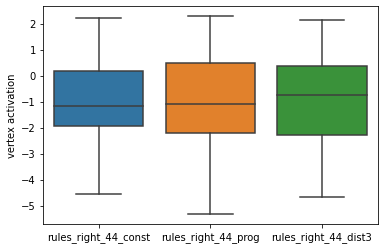

F-statistic: 0.1014707901731536
p-value: 0.9036143393530303
ANOVA结果：无显著差异
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
         group1                  group2         meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------
rules_left_8c_8av_const rules_left_8c_8av_dist3   0.1507    0.9 -1.0325 1.3339  False
rules_left_8c_8av_const  rules_left_8c_8av_prog   0.2183 0.8922 -0.9649 1.4015  False
rules_left_8c_8av_dist3  rules_left_8c_8av_prog   0.0676    0.9 -1.1156 1.2508  False
-------------------------------------------------------------------------------------


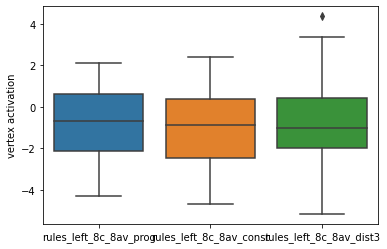

F-statistic: 0.32639551261520705
p-value: 0.7223994236990496
ANOVA结果：无显著差异
                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
           group1                         group2              meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------------------
attribute_right_insular_edge      attribute_right_insular_obj   -0.161 0.8023 -0.8028 0.4808  False
attribute_right_insular_edge attribute_right_insular_symbolic  -0.2071 0.7048 -0.8489 0.4347  False
 attribute_right_insular_obj attribute_right_insular_symbolic  -0.0461    0.9 -0.6879 0.5957  False
---------------------------------------------------------------------------------------------------


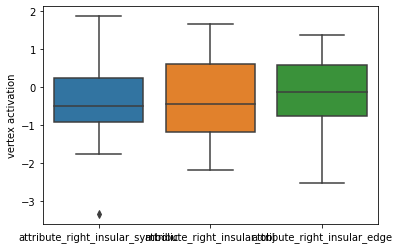

F-statistic: 0.4576703377896459
p-value: 0.6342706758750684
ANOVA结果：无显著差异
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
rules_right_10r_const rules_right_10r_dist3  -0.2145 0.7816 -1.0206 0.5917  False
rules_right_10r_const  rules_right_10r_prog   0.1024    0.9 -0.7037 0.9086  False
rules_right_10r_dist3  rules_right_10r_prog   0.3169 0.6092 -0.4892  1.123  False
---------------------------------------------------------------------------------


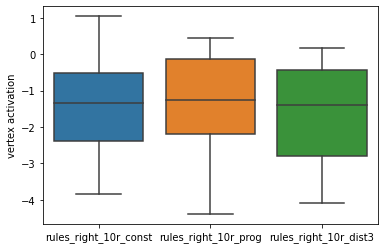

F-statistic: 0.46910269867373067
p-value: 0.6271363218696762
ANOVA结果：无显著差异
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                    group2           meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------
attribute_left_STS_edge      attribute_left_STS_obj   0.0297    0.9 -1.3425 1.4019  False
attribute_left_STS_edge attribute_left_STS_symbolic   0.4969 0.6513 -0.8753 1.8691  False
 attribute_left_STS_obj attribute_left_STS_symbolic   0.4672 0.6806  -0.905 1.8394  False
-----------------------------------------------------------------------------------------


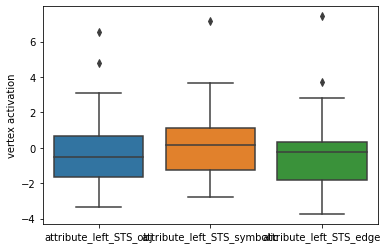

F-statistic: 0.06767737031962026
p-value: 0.9346110938950604
ANOVA结果：无显著差异
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                    group2           meandiff p-adj  lower  upper  reject
----------------------------------------------------------------------------------------
attribute_left_OFC_edge      attribute_left_OFC_obj  -0.0378   0.9 -0.4075 0.3319  False
attribute_left_OFC_edge attribute_left_OFC_symbolic   0.0181   0.9 -0.3516 0.3878  False
 attribute_left_OFC_obj attribute_left_OFC_symbolic   0.0559   0.9 -0.3138 0.4256  False
----------------------------------------------------------------------------------------


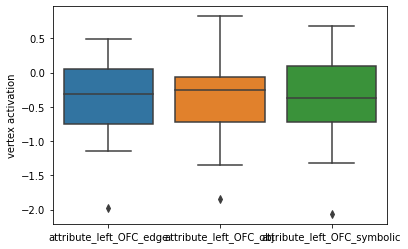

F-statistic: 0.12507717520039532
p-value: 0.8825871869746873
ANOVA结果：无显著差异
                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
rules_left_p47r_a47r_const rules_left_p47r_a47r_dist3   0.2866 0.8809 -1.1995 1.7727  False
rules_left_p47r_a47r_const  rules_left_p47r_a47r_prog   0.0372    0.9 -1.4489 1.5233  False
rules_left_p47r_a47r_dist3  rules_left_p47r_a47r_prog  -0.2494    0.9 -1.7355 1.2367  False
-------------------------------------------------------------------------------------------


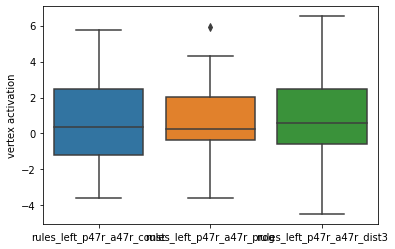

F-statistic: 0.011825169814034532
p-value: 0.9882460608382183
ANOVA结果：无显著差异
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj  lower  upper  reject
--------------------------------------------------------------------------------
rules_left_10pp_const rules_left_10pp_dist3  -0.0609   0.9 -1.0358  0.914  False
rules_left_10pp_const  rules_left_10pp_prog   -0.017   0.9 -0.9919 0.9579  False
rules_left_10pp_dist3  rules_left_10pp_prog   0.0439   0.9  -0.931 1.0189  False
--------------------------------------------------------------------------------


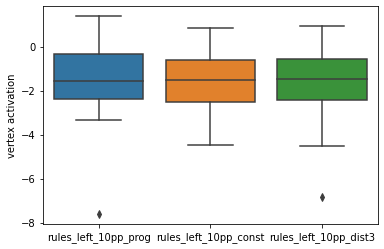

F-statistic: 0.5390934127977222
p-value: 0.5852124833331027
ANOVA结果：无显著差异
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
rules_right_31_const rules_right_31_dist3  -0.0757    0.9  -0.999 0.8477  False
rules_right_31_const  rules_right_31_prog   0.3041 0.6957 -0.6192 1.2275  False
rules_right_31_dist3  rules_right_31_prog   0.3798 0.5845 -0.5435 1.3032  False
-------------------------------------------------------------------------------


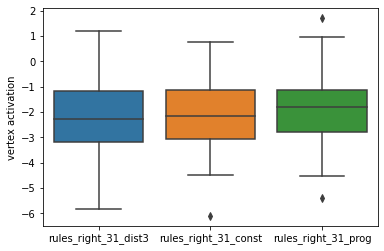

F-statistic: 0.0801168029213418
p-value: 0.9230765468993752
ANOVA结果：无显著差异
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                   group2          meandiff p-adj  lower  upper  reject
--------------------------------------------------------------------------------------
rules_right_8c_8av_const rules_right_8c_8av_dist3   0.1995   0.9 -1.0738 1.4728  False
rules_right_8c_8av_const  rules_right_8c_8av_prog   0.0333   0.9   -1.24 1.3066  False
rules_right_8c_8av_dist3  rules_right_8c_8av_prog  -0.1662   0.9 -1.4395 1.1071  False
--------------------------------------------------------------------------------------


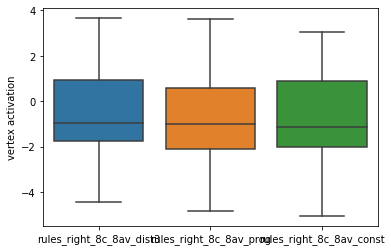

F-statistic: 0.05735657005790487
p-value: 0.9442929904565488
ANOVA结果：无显著差异
                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
           group1                      group2           meandiff p-adj  lower  upper  reject
--------------------------------------------------------------------------------------------
rules_right_a10r_a47r_const rules_right_a10r_a47r_dist3  -0.0178   0.9 -1.2613 1.2256  False
rules_right_a10r_a47r_const  rules_right_a10r_a47r_prog  -0.1611   0.9 -1.4045 1.0823  False
rules_right_a10r_a47r_dist3  rules_right_a10r_a47r_prog  -0.1433   0.9 -1.3867 1.1002  False
--------------------------------------------------------------------------------------------


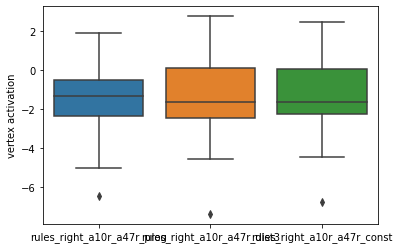

F-statistic: 0.5774954092376889
p-value: 0.5634393073977979
ANOVA结果：无显著差异
                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                              group2                meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------------------------
attribute_left_angular_gyrus_edge      attribute_left_angular_gyrus_obj  -0.0222    0.9 -1.9098 1.8654  False
attribute_left_angular_gyrus_edge attribute_left_angular_gyrus_symbolic   0.7254 0.6212 -1.1622  2.613  False
 attribute_left_angular_gyrus_obj attribute_left_angular_gyrus_symbolic   0.7476 0.6052   -1.14 2.6352  False
-------------------------------------------------------------------------------------------------------------


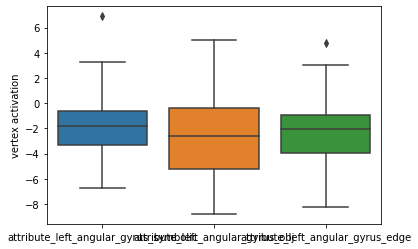

F-statistic: 0.3863845020235528
p-value: 0.6806693783711519
ANOVA结果：无显著差异
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
rules_left_10r_const rules_left_10r_dist3  -0.1507    0.9 -1.0821 0.7807  False
rules_left_10r_const  rules_left_10r_prog   0.1918 0.8631 -0.7396 1.1233  False
rules_left_10r_dist3  rules_left_10r_prog   0.3425 0.6436 -0.5889  1.274  False
-------------------------------------------------------------------------------


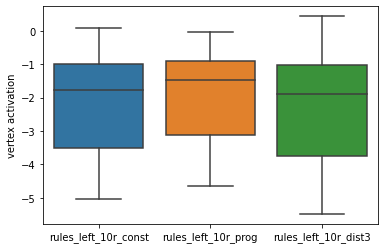

F-statistic: 0.06553072820914618
p-value: 0.9366164505922858
ANOVA结果：无显著差异
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj  lower  upper  reject
----------------------------------------------------------------------------
rules_left_44_const rules_left_44_dist3   0.2155   0.9 -1.2094 1.6404  False
rules_left_44_const  rules_left_44_prog   0.0915   0.9 -1.3333 1.5164  False
rules_left_44_dist3  rules_left_44_prog   -0.124   0.9 -1.5489 1.3009  False
----------------------------------------------------------------------------


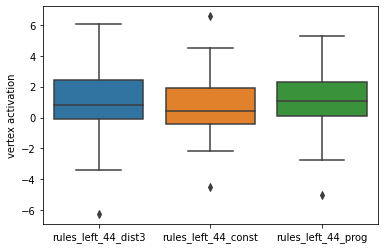

In [135]:
for roi_file in os.listdir(roi_save_path):
    roi = roi_file[0:roi_file.find('.')]
    roi_dict = {}
    for keys,values in roi_lists.items():
        if roi in keys:
            roi_dict[keys] = np.concatenate(values)
    masked_data1 = list(roi_dict.values())[0]
    masked_data2 = list(roi_dict.values())[1]
    masked_data3 = list(roi_dict.values())[2]
    data1_name = list(roi_dict.keys())[0]
    data2_name = list(roi_dict.keys())[1]
    data3_name = list(roi_dict.keys())[2]
    f_statistic, p_value = f_oneway(masked_data1, masked_data2, masked_data3)
    # 显示方差分析结果
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    # 判断是否显著差异
    if p_value < 0.05:
        print("ANOVA结果：有显著差异")
    else:
        print("ANOVA结果：无显著差异")
        
    data = np.concatenate([masked_data1, masked_data2, masked_data3])
    labels = np.array([data1_name] * len(masked_data1) + [data2_name] * len(masked_data2) + [data3_name] * len(masked_data3))
    df = pd.DataFrame({'Value': data, 'Group': labels})

    # 使用pairwise_tukeyhsd进行多重比较
    tukey_results = pairwise_tukeyhsd(df['Value'], df['Group'])

    print(tukey_results)

    # 绘制两个数据集的箱线图
    my_plot = sns.boxplot(data=[masked_data1, masked_data2, masked_data3])

    labels = [data1_name,data2_name,data3_name]
    my_plot.set_xticklabels(labels)

    plt.ylabel("vertex activation")
    # 显示图形
    plt.show()

In [134]:
list(roi_dict.keys())

['rules_left_44_dist3', 'rules_left_44_const', 'rules_left_44_prog']

In [114]:
for keys,values in roi_lists.items():
    if 'left_STS' in keys:
        print (keys)

attribute_left_STS_obj
attribute_left_STS_symbolic
attribute_left_STS_edge


In [109]:
np.concatenate(roi_lists['attribute_left_STS_obj'])

array([-1.09141761, -1.66170953, -0.54220358,  0.56980985,  0.49764864,
        0.9012683 ,  0.09620531,  1.31728308, -3.08836372, -1.67725574,
       -3.31452948, -1.40000263,  0.69440816, -2.96779484,  0.22977672,
        0.71806086,  6.53260873, -0.78610532, -0.52899224, -0.40977013,
       -1.40253581,  0.14206374, -1.75924254,  1.5674576 , -2.25345263,
        4.78115333, -3.03063588, -3.25449369, -1.09925818,  3.10636576])

In [ ]:
'attribute_left_STS_obj': [],
 'rules_right_10r_const': [],
 'attribute_left_angular_gyrus_symbolic': [],
 'rules_right_31_dist3': [],
 'rules_right_8c_8av_dist3': [],
 'attribute_left_angular_gyrus_obj': [],
 'attribute_left_STS_symbolic': [],
 'rules_right_44_const': [],
 'rules_left_44_dist3': [],
 'rules_left_p47r_a47r_const': [],
 'rules_left_10pp_prog': [],

In [ ]:
for roi_file in os.listdir(roi_save_path):
    if roi_file.startswith('attribute'):
        mask = nib.load(pjoin(roi_save_path,roi_file)).get_fdata().astype(int).reshape(-1)
        mask_vertex_number = np.sum(mask)
        for sub in sub_flag:
            for info in info_tuple_list:
                if info[0] == sub and ('obj' in info[1]):
                    template_obj = np.zeros_like(nib.load(template_brain).get_fdata())
                    template_obj = template_obj + nib.load(info[2]).get_fdata()
                if info[0] == sub and ('edge' in info[1]):
                    template_edge = np.zeros_like(nib.load(template_brain).get_fdata())
                    template_edge = template_edge + nib.load(info[2]).get_fdata()
                if info[0] == sub and ('symbolic' in info[1]):
                    template_symbolic = np.zeros_like(nib.load(template_brain).get_fdata())
                    template_symbolic = template_symbolic + nib.load(info[2]).get_fdata()
            roi_avg = np.sum(template_obj[mask])/mask_vertex_number
            print (roi_avg)                 

算被试间平均

In [ ]:
p = '/nfs/t2/raven/data/bold/derivatives/ciftify/sub-01/MNINonLinear/Results/ses-raven_task-action/ses-raven_task-action_hp200_s6_level2.feat/sub-01_ses-raven_task-action_level2_cope_dist3_symbolic_number_hp200_s6.dscalar.nii'

In [ ]:
sub_file = nib.load(p).get_fdata().reshape(-1)
list = []
for file in os.listdir(roi_save_path):
    if file.startswith('attribute'):
        roi_list = []
        roi_path = pjoin(roi_save_path,file)
        roi = nib.load(roi_path).get_fdata().reshape(-1).astype(int)
        for sub_file in sub_files:
            roi_data = sub_file[roi]
            roi_data_avg = np.sum(roi_data)/len(roi)
            list.append(roi_data_avg)

In [ ]:
template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in dist3:
    template = template + nib.load(file).get_fdata()       
template = template/90
dist3_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in const:
    template = template + nib.load(file).get_fdata()       
template = template/90
const_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in prog:
    template = template + nib.load(file).get_fdata()       
template = template/90
prog_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in symbolic:
    template = template + nib.load(file).get_fdata()       
template = template/90
symbolic_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in obj:
    template = template + nib.load(file).get_fdata()       
template = template/90
obj_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in edge:
    template = template + nib.load(file).get_fdata()       
template = template/90
edge_data = template.reshape(-1)

把roi内部平均

In [ ]:
template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in dist3:
    template = template + nib.load(file).get_fdata()      
dist3_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in const:
    template = template + nib.load(file).get_fdata()       
template = template/90
const_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in prog:
    template = template + nib.load(file).get_fdata()       
template = template/90
prog_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in symbolic:
    template = template + nib.load(file).get_fdata()       
template = template/90
symbolic_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in obj:
    template = template + nib.load(file).get_fdata()       
template = template/90
obj_data = template.reshape(-1)

template = np.zeros_like(nib.load(template_brain).get_fdata())
for file in edge:
    template = template + nib.load(file).get_fdata()       
template = template/90
edge_data = template.reshape(-1)

算被试拼接

In [ ]:
template = np.zeros((1,8215380))
for index,file in enumerate(dist3):
    template[:,91282*index : 91282*(index+1)] = nib.load(file).get_fdata()       
dist3_data = template.reshape(-1)

template = np.zeros((1,8215380))
for index,file in enumerate(const):
    template[:,91282*index : 91282*(index+1)] = nib.load(file).get_fdata()       
const_data = template.reshape(-1)

template = np.zeros((1,8215380))
for index,file in enumerate(prog):
    template[:,91282*index : 91282*(index+1)] = nib.load(file).get_fdata()       
prog_data = template.reshape(-1)

template = np.zeros((1,8215380))
for index,file in enumerate(symbolic):
    template[:,91282*index : 91282*(index+1)] = nib.load(file).get_fdata()       
symbolic_data = template.reshape(-1)

template = np.zeros((1,8215380))
for index,file in enumerate(obj):
    template[:,91282*index : 91282*(index+1)] = nib.load(file).get_fdata()       
obj_data = template.reshape(-1)

template = np.zeros((1,8215380))
for index,file in enumerate(edge):
    template[:,91282*index : 91282*(index+1)] = nib.load(file).get_fdata()       
edge_data = template.reshape(-1)

In [ ]:
for file in os.listdir(roi_save_path):
    if file.startswith('attribute'):
        roi_path = pjoin(roi_save_path,file)
        print('*************')
        print(file[0:file.find('.')])
        stat2(roi_path,symbolic_data,obj_data,edge_data,'symbolic','obj','edge')
    if file.startswith('rule'):
        roi_path = pjoin(roi_save_path,file)
        print('*************')
        print(file[0:file.find('.')])
        stat2(roi_path,dist3_data,const_data,prog_data,'dist3','const','prog')

In [ ]:
import numpy as np

# 假设你已经读入了一个 (1, 91282) 的数组 data，可以用随机数示例代替
data = np.random.rand(1, 91282)

# 将数组复制 80 次
copies = np.tile(data, (90, 1))

# 将副本数组拼接成一个大的 (1, 91282*90) 的数组
result_array = np.concatenate(copies, axis=0)

# 打印结果数组的形状
print(result_array.shape)